<a href="https://colab.research.google.com/github/salmanromeo/MAE_5020_Data_Driven_Aerospace_Engineering/blob/main/HW1_MAE5020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the Schlieren photograph of shock waves interacting between two aircraft and compute the full SVD.**

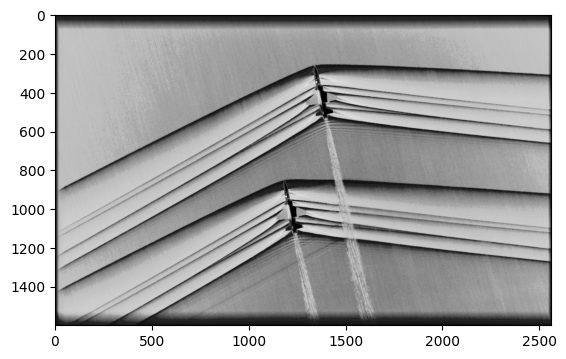

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from urllib.request import urlopen

# get the image from the url
url = "https://upload.wikimedia.org/wikipedia/commons/9/94/F4_p3_rgb_planedrop.jpg"

image = Image.open(urlopen(url))

# convert the image to grayscale
image = image.convert('L')

# convert the image to a numpy array
X = np.array(image)

# plot the image
plt.imshow(X, cmap='gray')
plt.show()

**Choose ranks 10, 20, and 40 and construct an approximate image for each rank.**

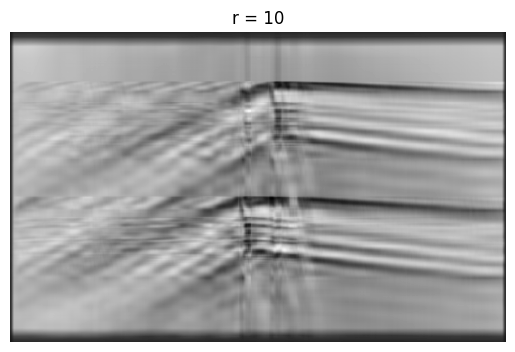

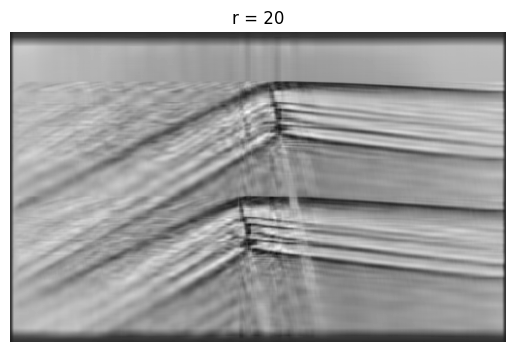

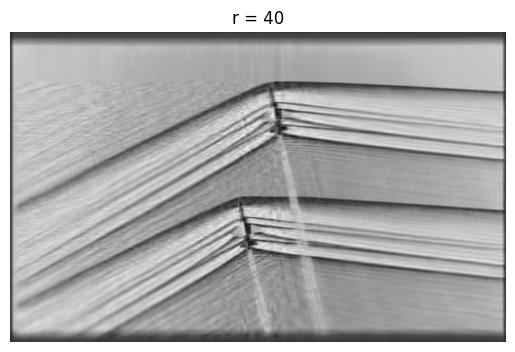

In [2]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (10, 20, 40):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

In [3]:
print("Shape     :", U.shape)
print("Shape     :", S.shape)
print("Shape     :", VT.shape)

Shape     : (1600, 1600)
Shape     : (1600, 1600)
Shape     : (1600, 2560)


**Identify the rank to have 90% of the information content of the singular values and plot the approximate image.**

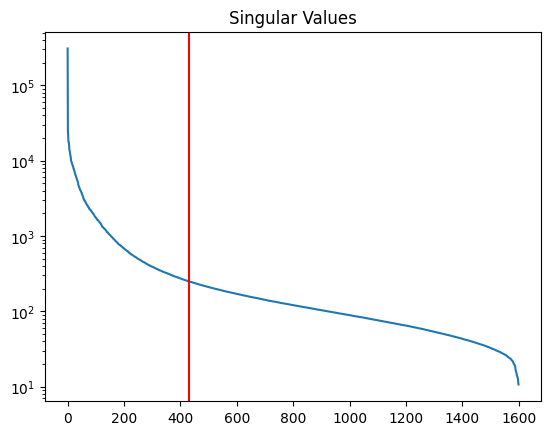

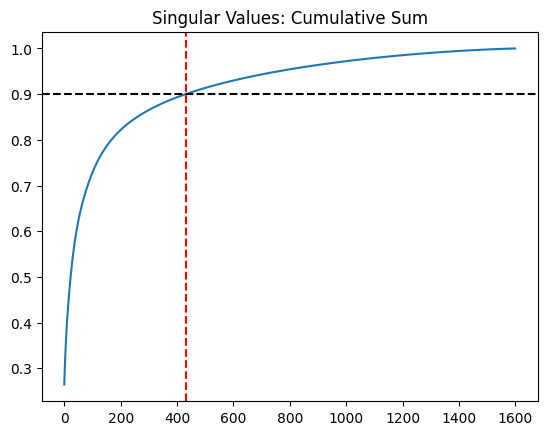

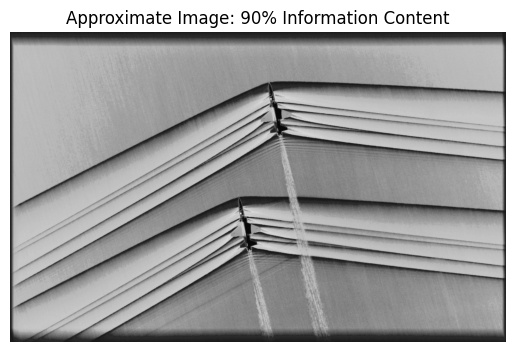

In [4]:
# Find the rank to have 90% of the information content
cumulative_sum = np.cumsum(np.diag(S)) / np.sum(np.diag(S))
rank_90_percent = np.argmax(cumulative_sum >= 0.9) + 1

# Plot the singular values
plt.figure(1)
plt.semilogy(np.diag(S))
plt.axvline(rank_90_percent, color='red')
plt.title('Singular Values')
plt.show()

# Plot the cumulative sum of singular values
plt.figure(2)
plt.plot(cumulative_sum)
plt.axvline(rank_90_percent, color='red', linestyle='dashed')
plt.axhline(0.9, color='black', linestyle='dashed')
plt.title('Singular Values: Cumulative Sum')
plt.show()

# Construct and plot the approximate image for the identified rank
Xapprox_90_percent = U[:, :rank_90_percent] @ S[0:rank_90_percent, :rank_90_percent] @ VT[:rank_90_percent, :]
plt.figure(3)
img = plt.imshow(Xapprox_90_percent, cmap='gray')
plt.axis('off')
plt.title('Approximate Image: 90% Information Content')
plt.show()

**Choose a rank r < m and confirm that the matrix UU^T is not identity matrix.**

r should be less than: 1600
Shape of UU^T: (1600, 1600)
Is UU^T close to an identity matrix? False
[[ 7.47189010e-05  7.29646201e-05  8.48560375e-05 ... -7.81005323e-06
  -8.38814394e-06 -6.78232117e-06]
 [ 7.29646201e-05  7.20265595e-05  8.31437524e-05 ... -5.55295370e-06
  -6.18059171e-06 -4.69126590e-06]
 [ 8.48560375e-05  8.31437524e-05  9.84624088e-05 ... -1.08521544e-05
  -1.18540384e-05 -1.01139997e-05]
 ...
 [-7.81005323e-06 -5.55295370e-06 -1.08521544e-05 ...  1.72665384e-04
   1.62098927e-04  1.56899751e-04]
 [-8.38814394e-06 -6.18059171e-06 -1.18540384e-05 ...  1.62098927e-04
   1.54316138e-04  1.49794128e-04]
 [-6.78232117e-06 -4.69126590e-06 -1.01139997e-05 ...  1.56899751e-04
   1.49794128e-04  1.46456207e-04]]


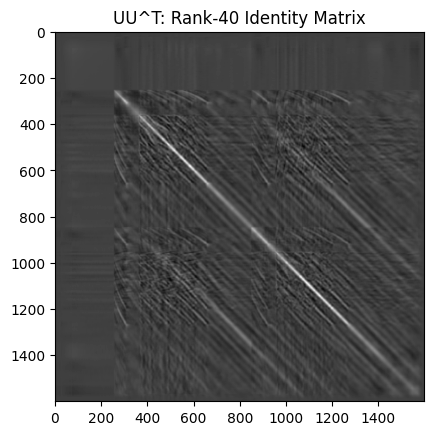

In [9]:
# Choose a rank r < m
print("r should be less than:", U.shape[0])
r = 40

# Confirm that UU^T is the r x r identity matrix
UUT = U[:, :r] @ U[:, :r].T
print("Shape of UU^T:", UUT.shape)

# Check if it is an identity matrix using np.allclose
is_identity_matrix = np.allclose(UUT, np.eye(U.shape[0]))
print("Is UU^T close to an identity matrix?", is_identity_matrix)

# Print the result
print(UUT)

# Plot the identity matrix
plt.imshow(UUT, cmap='gray')
plt.title('UU^T: Rank-{} Identity Matrix'.format(r))
plt.show()

**Choose a rank r < m and confirm that the matrix U^TU is the r x r identity matrix.**

r should be less than: 1600
Shape of U^T U: (40, 40)
Is U^T U close to an identity matrix? True
[[ 1.00000000e+00 -3.81639165e-17  1.04083409e-16 ... -4.03323208e-17
   6.59194921e-17  6.35342473e-17]
 [-3.81639165e-17  1.00000000e+00  1.64202419e-16 ... -9.19403442e-17
   3.72965547e-17  1.13570178e-17]
 [ 1.04083409e-16  1.64202419e-16  1.00000000e+00 ... -3.05419752e-16
  -1.73472348e-17  8.23993651e-18]
 ...
 [-4.03323208e-17 -9.19403442e-17 -3.05419752e-16 ...  1.00000000e+00
   6.24500451e-17  3.15719673e-16]
 [ 6.59194921e-17  3.72965547e-17 -1.73472348e-17 ...  6.24500451e-17
   1.00000000e+00  1.80411242e-16]
 [ 6.35342473e-17  1.13570178e-17  8.23993651e-18 ...  3.15719673e-16
   1.80411242e-16  1.00000000e+00]]


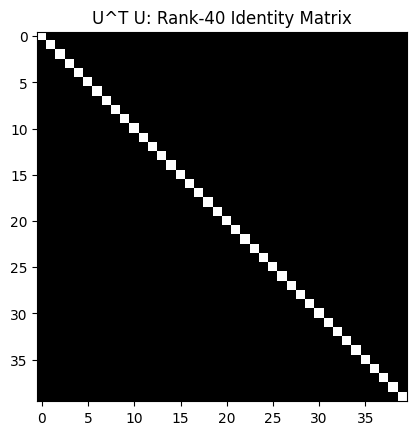

In [10]:
# Choose a rank r < m
print("r should be less than:", VT.shape[0])
r = 40

# Confirm that U^T U is the r x r identity matrix
UTU = U[:, :r].T @ U[:, :r]
print("Shape of U^T U:", UTU.shape)

# Check if it is an identity matrix using np.allclose
is_identity_matrix = np.allclose(UTU, np.eye(r))
print("Is U^T U close to an identity matrix?", is_identity_matrix)

# Print the result
print(UTU)

# Plot the identity matrix
plt.imshow(UTU, cmap='gray')
plt.title('U^T U: Rank-{} Identity Matrix'.format(r))
plt.show()

**Compute the norm of the error between UU^T and the n x n identity matrix as the rank r varies from 1 to n and plot the error.**

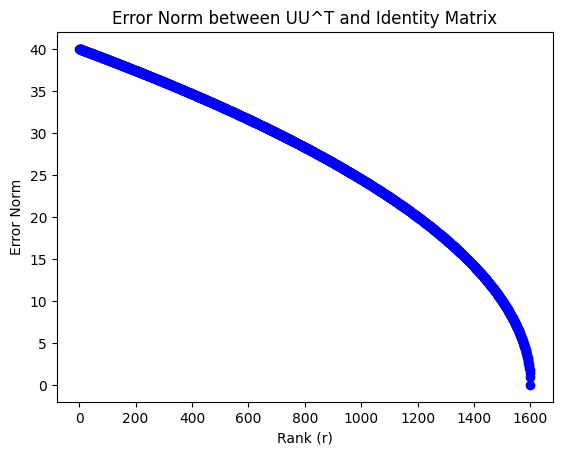

In [11]:
n = U.shape[0]
rank_values = np.arange(1, n+1)

# Compute the error for each rank
errors = []
for r in rank_values:
    UUT = U[:, :r] @ U[:, :r].T
    error = np.linalg.norm(UUT - np.eye(U.shape[0]))
    errors.append(error)

# Plot the error
plt.plot(rank_values, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Rank (r)')
plt.ylabel('Error Norm')
plt.title('Error Norm between UU^T and Identity Matrix')
plt.show()

**Load the Actual photograph of shock waves interacting between two aircraft and compute the full SVD.**

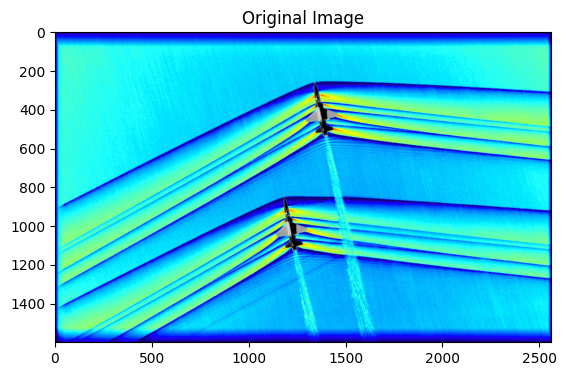

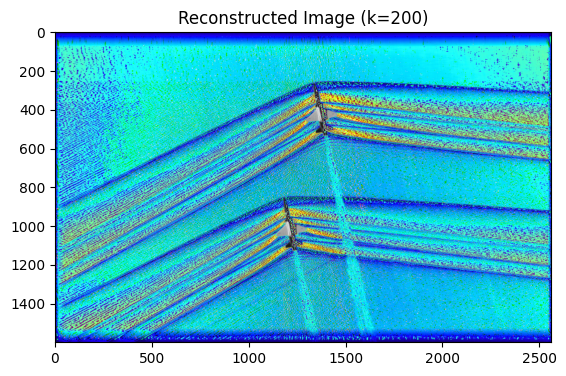

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Get the image from the URL
url = "https://upload.wikimedia.org/wikipedia/commons/9/94/F4_p3_rgb_planedrop.jpg"
img = Image.open(urlopen(url))
img_array = np.array(img)

# Display the original image
plt.imshow(img_array)
plt.title("Original Image")
plt.show()

# Separate color channels for the SVD
red_channel, green_channel, blue_channel = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]

# Compute the full SVD for each color channel
U_r, S_r, Vt_r = np.linalg.svd(red_channel, full_matrices=True)
U_g, S_g, Vt_g = np.linalg.svd(green_channel, full_matrices=True)
U_b, S_b, Vt_b = np.linalg.svd(blue_channel, full_matrices=True)

# Choose the value of k for reconstruction (adjust as needed)
k = 200

# Reconstruct each color channel using a subset of singular values
reconstructed_red = np.dot(U_r[:, :k], np.dot(np.diag(S_r[:k]), Vt_r[:k, :]))
reconstructed_green = np.dot(U_g[:, :k], np.dot(np.diag(S_g[:k]), Vt_g[:k, :]))
reconstructed_blue = np.dot(U_b[:, :k], np.dot(np.diag(S_b[:k]), Vt_b[:k, :]))

# Combine the reconstructed color channels
reconstructed_img = np.stack([reconstructed_red, reconstructed_green, reconstructed_blue], axis=-1)

# Display the reconstructed image
plt.imshow(reconstructed_img.astype(np.uint8))
plt.title(f"Reconstructed Image (k={k})")
plt.show()

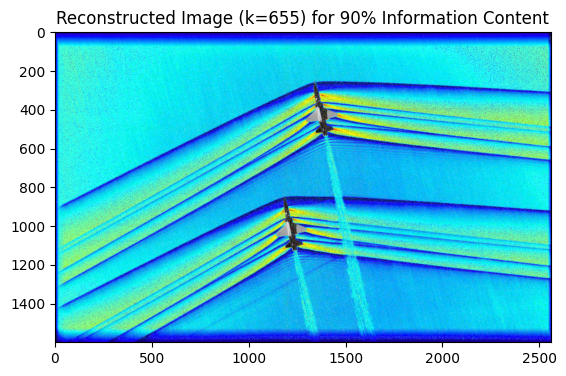

In [20]:
# Compute cumulative sum for each channel
cumulative_sum_r = np.cumsum(S_r) / np.sum(S_r)
cumulative_sum_g = np.cumsum(S_g) / np.sum(S_g)
cumulative_sum_b = np.cumsum(S_b) / np.sum(S_b)

# Identify rank for 90% information content
rank_90_percent_r = np.argmax(cumulative_sum_r >= 0.9) + 1
rank_90_percent_g = np.argmax(cumulative_sum_g >= 0.9) + 1
rank_90_percent_b = np.argmax(cumulative_sum_b >= 0.9) + 1

# Choose the minimum rank among the three channels
k = max(rank_90_percent_r, rank_90_percent_g, rank_90_percent_b)

# Reconstruct each color channel using the identified rank
reconstructed_red = np.dot(U_r[:, :k], np.dot(np.diag(S_r[:k]), Vt_r[:k, :]))
reconstructed_green = np.dot(U_g[:, :k], np.dot(np.diag(S_g[:k]), Vt_g[:k, :]))
reconstructed_blue = np.dot(U_b[:, :k], np.dot(np.diag(S_b[:k]), Vt_b[:k, :]))

# Combine the reconstructed color channels
reconstructed_img = np.stack([reconstructed_red, reconstructed_green, reconstructed_blue], axis=-1)

# Display the reconstructed image
plt.imshow(reconstructed_img.astype(np.uint8))
plt.title(f"Reconstructed Image (k={k}) for 90% Information Content")
plt.show()

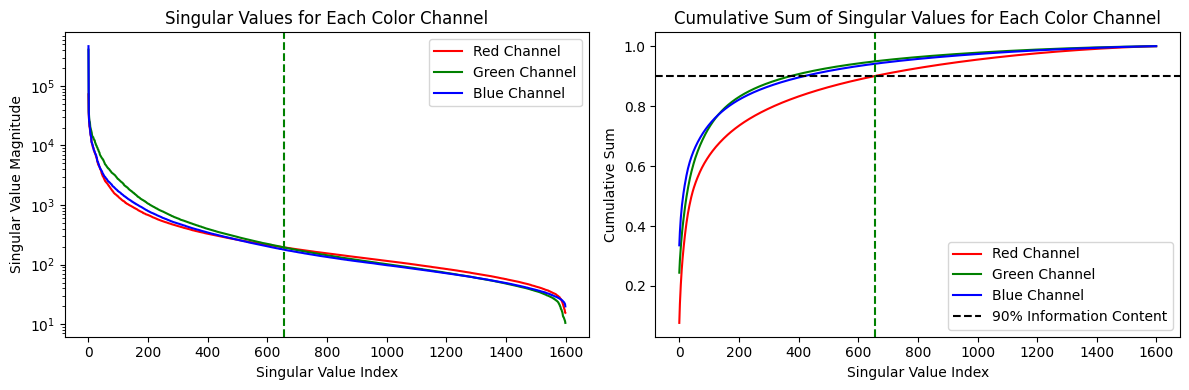

In [25]:
# Plot the singular values for each color channel
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.semilogy(S_r, label='Red Channel', color='red')
plt.semilogy(S_g, label='Green Channel', color='green')
plt.semilogy(S_b, label='Blue Channel', color='blue')
plt.axvline(k, color='green', linestyle='dashed')
plt.title('Singular Values for Each Color Channel')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value Magnitude')
plt.legend()

# Plot the cumulative sum of singular values for each color channel
plt.subplot(1, 2, 2)
plt.plot(cumulative_sum_r, label='Red Channel', color='red')
plt.plot(cumulative_sum_g, label='Green Channel', color='green')
plt.plot(cumulative_sum_b, label='Blue Channel', color='blue')
plt.axhline(0.9, color='black', linestyle='dashed', label='90% Information Content')
plt.axvline(k, color='green', linestyle='dashed')
plt.title('Cumulative Sum of Singular Values for Each Color Channel')
plt.xlabel('Singular Value Index')
plt.ylabel('Cumulative Sum')
plt.legend()

plt.tight_layout()
plt.show()

**Generate a random 50 x 50 matrix, i.e., a matrix whose entries are sampled from a normal distribution.**
**1.   Compute the SVD of this matrix and plot the singular values.**
**2.   Repeat this 100 times and plot the distribution of singular values in a box-and-whisker plot.**
**1.   Plot the mean and median singular values as a function of r.**

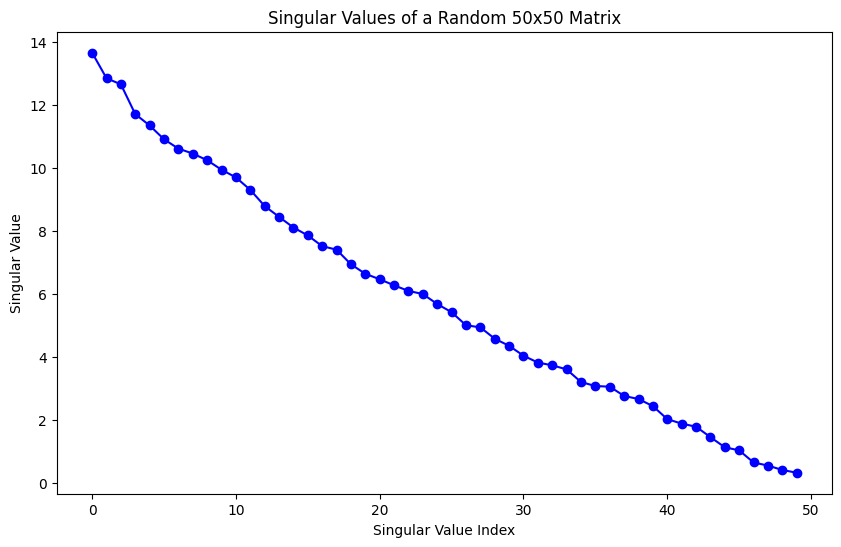

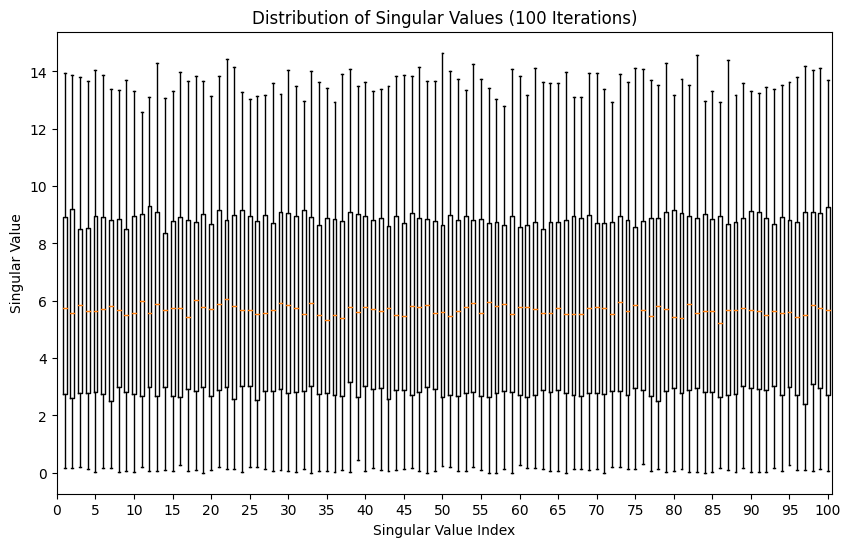

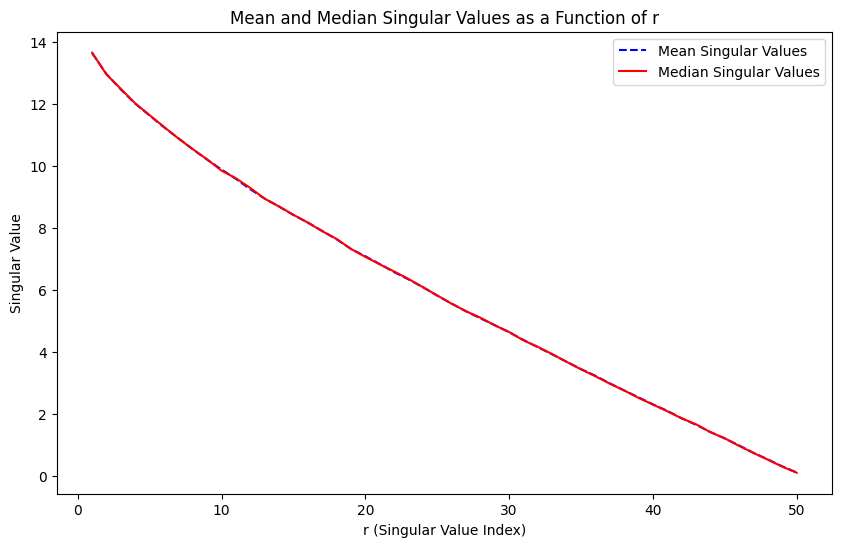

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Function to generate a random 50x50 matrix and compute its SVD
def generate_svd():
    matrix = np.random.normal(size=(50, 50))
    _, s, _ = np.linalg.svd(matrix)
    return s

# Task 1: Compute the SVD of a single random matrix and plot the singular values
singular_values = generate_svd()

plt.figure(figsize=(10, 6))
plt.plot(singular_values, marker='o', linestyle='-', color='b')
plt.title('Singular Values of a Random 50x50 Matrix')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.show()

# Task 2: Repeat the process 100 times and store singular values in a list
num_iterations = 100
singular_values_list = [generate_svd() for _ in range(num_iterations)]

# Task 2: Plot the distribution of singular values in a box-and-whisker plot
plt.figure(figsize=(10, 6))
plt.boxplot(singular_values_list)
plt.title('Distribution of Singular Values (100 Iterations)')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.xticks(np.arange(0, 101, step=5), np.arange(0, 101, step=5))
plt.show()

# Task 3: Plot the mean and median singular values as a function of r
mean_singular_values = np.mean(singular_values_list, axis=0)
median_singular_values = np.median(singular_values_list, axis=0)

r_values = np.arange(1, 51)

plt.figure(figsize=(10, 6))
plt.plot(r_values, mean_singular_values, "b--", label='Mean Singular Values')
plt.plot(r_values, median_singular_values, "r-", label='Median Singular Values')
plt.title('Mean and Median Singular Values as a Function of r')
plt.xlabel('r (Singular Value Index)')
plt.ylabel('Singular Value')
plt.legend()
plt.show()